Iteration1:
Cost:4352.088931274409, 
Weight:0.7593291142562117, 
Bias:0.02288558130709
Iteration2:
Cost:1114.8561474350017, 
Weight:1.081602958862324, 
Bias:0.02918014748569513
Iteration3:
Cost:341.42912086804455, 
Weight:1.2391274084945083, 
Bias:0.03225308846928192
Iteration4:
Cost:156.64495290904443, 
Weight:1.3161239281746984, 
Bias:0.03375132986012604
Iteration5:
Cost:112.49704004742098, 
Weight:1.3537591652024805, 
Bias:0.034479873154934775
Iteration6:
Cost:101.9493925395456, 
Weight:1.3721549833978113, 
Bias:0.034832195392868505
Iteration7:
Cost:99.4293893333546, 
Weight:1.3811467575154601, 
Bias:0.03500062439068245
Iteration8:
Cost:98.82731958262897, 
Weight:1.3855419247507244, 
Bias:0.03507916814736111
Iteration9:
Cost:98.68347500997261, 
Weight:1.3876903144657764, 
Bias:0.035113776874486774
Iteration10:
Cost:98.64910780902792, 
Weight:1.3887405007983562, 
Bias:0.035126910596389935
Iteration11:
Cost:98.64089651459352, 
Weight:1.389253895811451, 
Bias:0.03512954755833985
Iterat

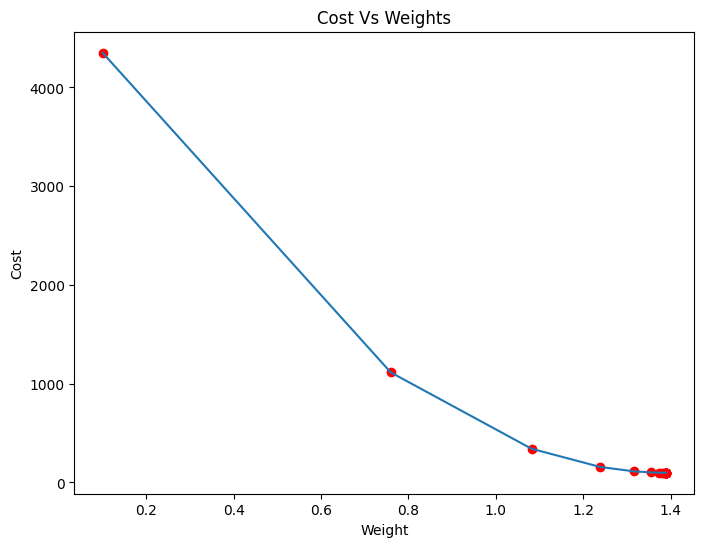

Estimated Weight: (estimated_ weight)
Estimated Bias: (estimated_bias)


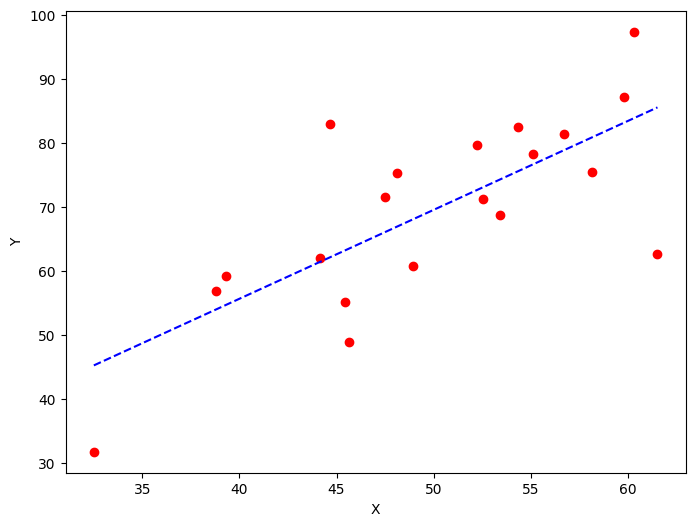

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
    #calculating the loss or cost
    cost = np.sum((y_true - y_predicted)**2)/len(y_true)
    return cost



#Gradint Descent Function
#Here iterrsations, learning rate, stopping threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):

    #initializing weight, bias, LR and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n= float(len(x))

    costs = []
    weights = []
    previous_cost = None

    #Estimation of optimal characters
    for i in range(iterations):

        #Making Predictions
        y_predicted = (current_weight * x) + current_bias

        #calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)

        #if the change in cost is less then or equal to stopping threshold we stop the gradient descent
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)

        #Calculating the Gradients
        weight_derivative = -(2/n) * sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * sum(y - y_predicted)

        #Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        #Printing the parameters for each 1000th iteration
        print(f"Iteration{i+1}:\nCost:{current_cost}, \nWeight:{current_weight}, \nBias:{current_bias}")

    #Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker = 'o', color = 'red')
    plt.title("Cost Vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    return current_weight, current_bias


def main():

    #Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
                          55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
                          45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
                          48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
                  78.21151827, 79.64197305, 59.17148932, 75.3312423, 71.30087989,
                  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
                  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: (estimated_ weight)\nEstimated Bias: (estimated_bias)")
    # Making predictions using estimated parameters
    Y_pred = estimated_weight * X + estimated_bias
    # Plotting the regression line
    plt.figure(figsize= (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
    markersize=10, linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

if __name__ == "__main__":
                main()